<a href="https://colab.research.google.com/github/prakarshjain28/DL_CustomActivation_Project/blob/master/classification_mnist_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clothing image classification using custom activation functions (CNN-MNIST dataset)

This guide trains a neural network model to classify images of clothing, like sneakers and shirts.

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# To setup CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout

print(tf.__version__)

2.2.0


## Import the Fashion MNIST dataset


Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

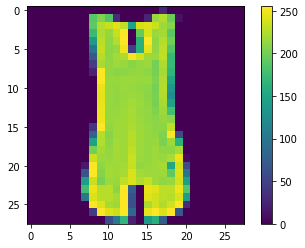

In [5]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [7]:
test_images.shape

(10000, 28, 28)

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

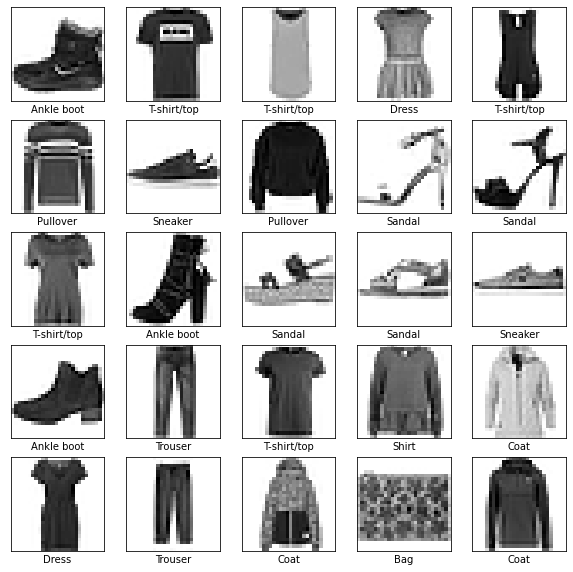

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(list(test_images.shape)+[1])

In [10]:
test_images.shape

(10000, 28, 28, 1)

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

**Custom Activation Functions**

In [0]:
# f(x) = sin(x)
def sin_act(x):
  return tf.math.sin(x, name=None)

# f(x) = ln(1 + e^x)
def softPlus(x):
  return tf.math.log(1.0 + tf.math.exp(x, name=None))

# f(x) = arctan(x)
def arcTan(x):
  return tf.math.atan(x)


# f(x) = ln(1 + (e^x/(1 + e^x)))
def custom_1(x):
  return tf.math.log(1.0 + (tf.math.exp(x) / (1.0 + tf.math.exp(x))))


# f(x) = ((x^2 + 1)^(1/2) + x)/2 - 1
def custom_2(x):
  return ((tf.math.sqrt(x**2+1) - 1.0) / 2.0 + 0.5*x)

#f(x)=((log(sin^2(x)+2))-1)
def custom_3(x):
  return ((tf.math.log(tf.math.sin(x)**2+2) - 1.0) )


### Create the convolutional base

![alt text](https://github.com/prakarshjain28/DL_CustomActivation_Project/blob/master/cnn-mnist.png?raw=true)

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

In [0]:
def setupLayers(activationFunction):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation=activationFunction, input_shape=(28,28,1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation=activationFunction))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation=activationFunction))
  model.add(Flatten())
  model.add(Dense(64, activation=activationFunction, kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  return model

### Using Dense layers

![alt text](https://github.com/prakarshjain28/DL_CustomActivation_Project/blob/master/cnn-mnist-complete.png?raw=true)

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

After the pixels are flattened, the network consists of a sequence of two layers that are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
def compileModel(model):
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [0]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

def trainModel(model):
#   early_stop = EarlyStopping(monitor='val_loss',patience=3)
  history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
  return history

### Plot

In [0]:
def plot(history, title, type_1, type_2, yLabel):
  plt.plot(history.history[type_1], label=type_1)
  plt.plot(history.history[type_2], label = type_2)
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel(yLabel)
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [0]:
def evaluateModel(model):
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print('\nTest accuracy: ' + str(test_acc*100) + '%')

### Run the model

In [0]:
def run(activationFunction):
  model = setupLayers(activationFunction)
  compileModel(model)
  print('***************************** '+ str(activationFunction) + 'Activation ***********************')
  history = trainModel(model)
  evaluateModel(model)
  return history

### Run model using custom activation functions

## Using Sigmoid Activation Function

***************************** sigmoidActivation ***********************
Epoch 1/15
1875/1875 [==============================] - 55s 30ms/step - loss: 1.8284 - accuracy: 0.6459 - val_loss: 1.7173 - val_accuracy: 0.7514
Epoch 2/15
1875/1875 [==============================] - 55s 29ms/step - loss: 1.6971 - accuracy: 0.7689 - val_loss: 1.6948 - val_accuracy: 0.7702
Epoch 3/15
1875/1875 [==============================] - 55s 30ms/step - loss: 1.6723 - accuracy: 0.7922 - val_loss: 1.6710 - val_accuracy: 0.7915
Epoch 4/15
1875/1875 [==============================] - 55s 30ms/step - loss: 1.6581 - accuracy: 0.8053 - val_loss: 1.6627 - val_accuracy: 0.8005
Epoch 5/15
1875/1875 [==============================] - 56s 30ms/step - loss: 1.6493 - accuracy: 0.8137 - val_loss: 1.6599 - val_accuracy: 0.8014
Epoch 6/15
1875/1875 [==============================] - 57s 30ms/step - loss: 1.6436 - accuracy: 0.8183 - val_loss: 1.6463 - val_accuracy: 0.8166
Epoch 7/15
1875/1875 [==============================

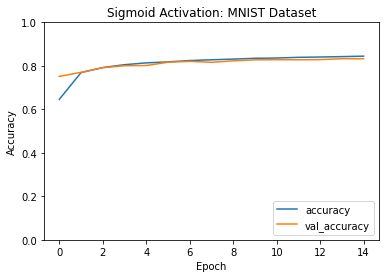

In [19]:
sigmoidHistory = run('sigmoid')
plot(sigmoidHistory, 'Sigmoid Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using ReLU Activation Function

***************************** reluActivation ***********************
Epoch 1/15
1875/1875 [==============================] - 56s 30ms/step - loss: 1.7405 - accuracy: 0.7225 - val_loss: 1.7149 - val_accuracy: 0.7465
Epoch 2/15
1875/1875 [==============================] - 56s 30ms/step - loss: 1.6774 - accuracy: 0.7839 - val_loss: 1.6817 - val_accuracy: 0.7780
Epoch 3/15
1875/1875 [==============================] - 55s 30ms/step - loss: 1.6245 - accuracy: 0.8364 - val_loss: 1.6123 - val_accuracy: 0.8484
Epoch 4/15
1875/1875 [==============================] - 55s 29ms/step - loss: 1.5923 - accuracy: 0.8688 - val_loss: 1.6006 - val_accuracy: 0.8595
Epoch 5/15
1875/1875 [==============================] - 56s 30ms/step - loss: 1.5832 - accuracy: 0.8781 - val_loss: 1.5836 - val_accuracy: 0.8771
Epoch 6/15
1875/1875 [==============================] - 55s 29ms/step - loss: 1.5765 - accuracy: 0.8849 - val_loss: 1.5851 - val_accuracy: 0.8760
Epoch 7/15
1875/1875 [==============================] -

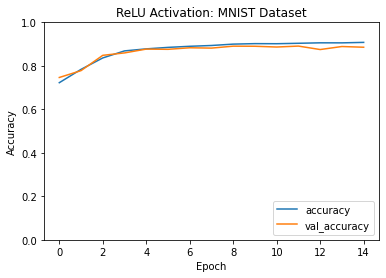

In [20]:
reluHistory = run('relu')
plot(reluHistory, 'ReLU Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using tanH Activation Function

***************************** tanhActivation ***********************
Epoch 1/15
1875/1875 [==============================] - 57s 30ms/step - loss: 1.6688 - accuracy: 0.7993 - val_loss: 1.6207 - val_accuracy: 0.8429
Epoch 2/15
1875/1875 [==============================] - 57s 30ms/step - loss: 1.6045 - accuracy: 0.8600 - val_loss: 1.6040 - val_accuracy: 0.8602
Epoch 3/15
1875/1875 [==============================] - 57s 31ms/step - loss: 1.5885 - accuracy: 0.8746 - val_loss: 1.6002 - val_accuracy: 0.8630
Epoch 4/15
1875/1875 [==============================] - 57s 31ms/step - loss: 1.5776 - accuracy: 0.8856 - val_loss: 1.5855 - val_accuracy: 0.8776
Epoch 5/15
1875/1875 [==============================] - 57s 30ms/step - loss: 1.5704 - accuracy: 0.8927 - val_loss: 1.5809 - val_accuracy: 0.8816
Epoch 6/15
1875/1875 [==============================] - 57s 31ms/step - loss: 1.5645 - accuracy: 0.8985 - val_loss: 1.5824 - val_accuracy: 0.8790
Epoch 7/15
1875/1875 [==============================] -

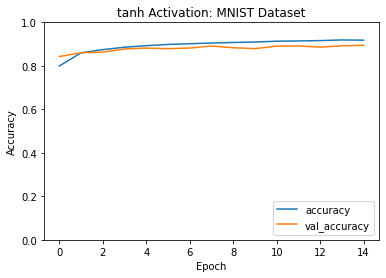

In [21]:
tanhHistory = run('tanh')
plot(tanhHistory, 'tanh Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using arcTan Activation Function

***************************** <function arcTan at 0x7f2b0d1caf28>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 72s 39ms/step - loss: 1.6649 - accuracy: 0.8028 - val_loss: 1.6282 - val_accuracy: 0.8359
Epoch 2/15
1875/1875 [==============================] - 73s 39ms/step - loss: 1.6061 - accuracy: 0.8571 - val_loss: 1.6087 - val_accuracy: 0.8525
Epoch 3/15
1875/1875 [==============================] - 73s 39ms/step - loss: 1.5908 - accuracy: 0.8719 - val_loss: 1.5930 - val_accuracy: 0.8710
Epoch 4/15
1875/1875 [==============================] - 72s 39ms/step - loss: 1.5810 - accuracy: 0.8812 - val_loss: 1.5906 - val_accuracy: 0.8730
Epoch 5/15
1875/1875 [==============================] - 72s 39ms/step - loss: 1.5738 - accuracy: 0.8885 - val_loss: 1.5769 - val_accuracy: 0.8856
Epoch 6/15
1875/1875 [==============================] - 72s 39ms/step - loss: 1.5679 - accuracy: 0.8946 - val_loss: 1.5789 - val_accuracy: 0.8817
Epoch 7/15
1875/1875 [==

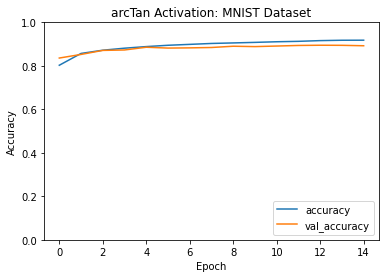

In [22]:
arcTanHistory = run(arcTan)
plot(arcTanHistory, 'arcTan Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using Custom-1 Activation Function

***************************** <function custom_1 at 0x7f2b0d1cae18>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 69s 37ms/step - loss: 1.9132 - accuracy: 0.5595 - val_loss: 1.7380 - val_accuracy: 0.7369
Epoch 2/15
1875/1875 [==============================] - 69s 37ms/step - loss: 1.7124 - accuracy: 0.7561 - val_loss: 1.7160 - val_accuracy: 0.7486
Epoch 3/15
1875/1875 [==============================] - 69s 37ms/step - loss: 1.6900 - accuracy: 0.7750 - val_loss: 1.6870 - val_accuracy: 0.7771
Epoch 4/15
1875/1875 [==============================] - 70s 37ms/step - loss: 1.6753 - accuracy: 0.7890 - val_loss: 1.6771 - val_accuracy: 0.7862
Epoch 5/15
1875/1875 [==============================] - 71s 38ms/step - loss: 1.6650 - accuracy: 0.7983 - val_loss: 1.6718 - val_accuracy: 0.7909
Epoch 6/15
1875/1875 [==============================] - 70s 37ms/step - loss: 1.6559 - accuracy: 0.8078 - val_loss: 1.6632 - val_accuracy: 0.7989
Epoch 7/15
1875/1875 [

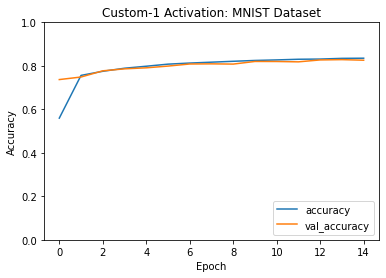

In [23]:
custom_1_History = run(custom_1)
plot(custom_1_History, 'Custom-1 Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using Custom-2 Activation Function

***************************** <function custom_2 at 0x7f2b0d1caa60>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 64s 34ms/step - loss: 1.6975 - accuracy: 0.7645 - val_loss: 1.6483 - val_accuracy: 0.8129
Epoch 2/15
1875/1875 [==============================] - 64s 34ms/step - loss: 1.6253 - accuracy: 0.8357 - val_loss: 1.6196 - val_accuracy: 0.8409
Epoch 3/15
1875/1875 [==============================] - 64s 34ms/step - loss: 1.6071 - accuracy: 0.8541 - val_loss: 1.6085 - val_accuracy: 0.8516
Epoch 4/15
1875/1875 [==============================] - 64s 34ms/step - loss: 1.5973 - accuracy: 0.8634 - val_loss: 1.5944 - val_accuracy: 0.8660
Epoch 5/15
1875/1875 [==============================] - 64s 34ms/step - loss: 1.5903 - accuracy: 0.8702 - val_loss: 1.5920 - val_accuracy: 0.8684
Epoch 6/15
1875/1875 [==============================] - 64s 34ms/step - loss: 1.5845 - accuracy: 0.8761 - val_loss: 1.5959 - val_accuracy: 0.8653
Epoch 7/15
1875/1875 [

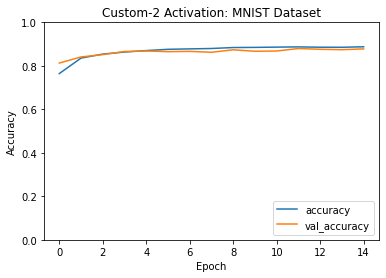

In [24]:
custom_2_History = run(custom_2)
plot(custom_2_History, 'Custom-2 Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using Custom-3 Activation Function

***************************** <function custom_3 at 0x7f2b0d1d9d08>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 66s 35ms/step - loss: 1.7927 - accuracy: 0.7054 - val_loss: 1.6761 - val_accuracy: 0.7927
Epoch 2/15
1875/1875 [==============================] - 66s 35ms/step - loss: 1.6545 - accuracy: 0.8128 - val_loss: 1.6461 - val_accuracy: 0.8186
Epoch 3/15
1875/1875 [==============================] - 67s 35ms/step - loss: 1.6378 - accuracy: 0.8274 - val_loss: 1.6371 - val_accuracy: 0.8272
Epoch 4/15
1875/1875 [==============================] - 66s 35ms/step - loss: 1.6272 - accuracy: 0.8363 - val_loss: 1.6248 - val_accuracy: 0.8415
Epoch 5/15
1875/1875 [==============================] - 67s 36ms/step - loss: 1.6016 - accuracy: 0.8631 - val_loss: 1.6015 - val_accuracy: 0.8644
Epoch 6/15
1875/1875 [==============================] - 67s 36ms/step - loss: 1.5829 - accuracy: 0.8826 - val_loss: 1.5937 - val_accuracy: 0.8709
Epoch 7/15
1875/1875 [

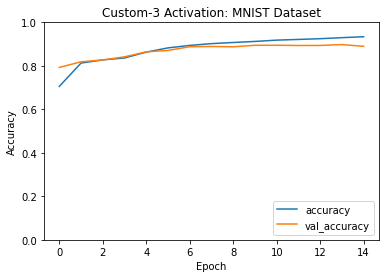

In [25]:
custom_3_History = run(custom_3)
plot(custom_3_History, 'Custom-3 Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Validation Accuracy Comparison

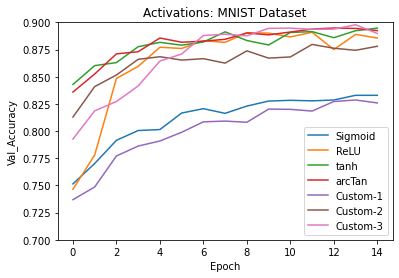

In [26]:
plt.plot(sigmoidHistory.history['val_accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_accuracy'], label='ReLU')
plt.plot(tanhHistory.history['val_accuracy'], label='tanh')
plt.plot(arcTanHistory.history['val_accuracy'], label='arcTan')
plt.plot(custom_1_History.history['val_accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['val_accuracy'], label='Custom-2')
plt.plot(custom_3_History.history['val_accuracy'], label='Custom-3')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Accuracy')
plt.ylim([0.7, 0.9])
plt.legend(loc='lower right')


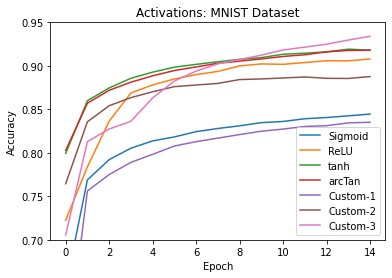

In [27]:
plt.plot(sigmoidHistory.history['accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['accuracy'], label='ReLU')
plt.plot(tanhHistory.history['accuracy'], label='tanh')
plt.plot(arcTanHistory.history['accuracy'], label='arcTan')
plt.plot(custom_1_History.history['accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['accuracy'], label='Custom-2')
plt.plot(custom_3_History.history['accuracy'], label='Custom-3')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.95])
plt.legend(loc='lower right')

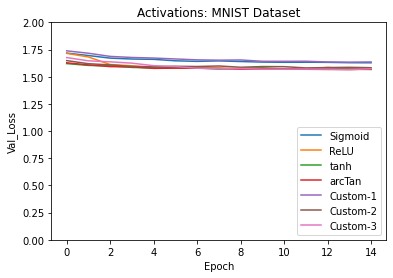

In [28]:
plt.plot(sigmoidHistory.history['val_loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_loss'], label='ReLU')
plt.plot(tanhHistory.history['val_loss'], label='tanh')
plt.plot(arcTanHistory.history['val_loss'], label='arcTan')
plt.plot(custom_1_History.history['val_loss'], label='Custom-1')
plt.plot(custom_2_History.history['val_loss'], label='Custom-2')
plt.plot(custom_3_History.history['val_loss'], label='Custom-3')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Loss')
plt.ylim([0.0, 2])
plt.legend(loc='lower right')

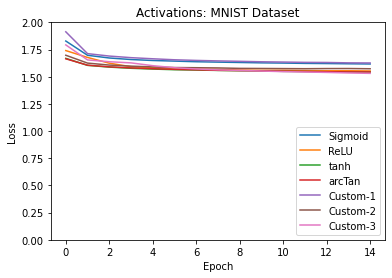

In [29]:
plt.plot(sigmoidHistory.history['loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['loss'], label='ReLU')
plt.plot(tanhHistory.history['loss'], label='tanh')
plt.plot(arcTanHistory.history['loss'], label='arcTan')
plt.plot(custom_1_History.history['loss'], label='Custom-1')
plt.plot(custom_2_History.history['loss'], label='Custom-2')
plt.plot(custom_3_History.history['loss'], label='Custom-3')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')